In [1]:

import math
import numpy as np
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# import geocoder

# import requests # library to handle requests
# from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from datetime import datetime

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# import folium # map rendering library

# from bs4 import BeautifulSoup
# import html5lib

import warnings
warnings.simplefilter("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

print('Libraries imported.')

Libraries imported.


In [2]:
slab_sales = pd.read_excel(r'C:\Users\15146\Desktop\Forecast\SalesSummary_Ot.xlsx')

In [3]:
# slab_sales.iloc[[-1,0]]
# slab_sales.head()

In [4]:
# slab_sales.info()

In [5]:
slab_sales.columns = slab_sales.iloc[1]
slab_sales = slab_sales.iloc[2:]
slab_sales.reset_index(drop=True)
slab_sales.head()

1,Item Name,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,NaN
2,Alaska Wave 3cm - Discontinued,2,2,6,2,0,6,5,5,3,4,3,3,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1980,1980,4790.01,1980,0,5940,4950,4590.78,2610.78,3859.6,2317.56,1892.34,3960,3600.78,0,0,1056,0,0,0,0,0,NaN
3,Amethyst 3cm,0,0,1,0,1,0,0,0,3,0,0,0,0,0,2,1,0,4,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1250,0,0,0,4895,0,0,0,0,0,3200,1448,0,5796,1450,1448,4344,1448,NaN
4,Antique Concrete 2cm,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,923,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
5,Antique Concrete 3cm,0,0,0,0,0,2,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2250,1125,0,0,0,0,1925,0,0,0,0,0,0,0,0,0,0,NaN
6,Antique Concrete Honed 3cm(New),0,0,0,0,0,0,0,0,0,1,1,1,4,1,2,0,0,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1196,1196,1196,4784,1196,2552,0,0,4784,0,0,2472,0,NaN


In [6]:
slab_sales.shape[1]

68

In [7]:
# qty = slab_sales.iloc[:, 25:49]
# qty.reset_index(drop=True)
# item_name = slab_sales[['Item Name']]
# item_name.reset_index(drop=True)
# slab_sales_qty = slab_sales[['Item Name']].join(slab_sales.iloc[:, 0:25])
last_col = int((slab_sales.shape[1] + 1)/3)
slab_sales_qty = slab_sales.iloc[:,0:last_col]
slab_sales_qty.head()

1,Item Name,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
2,Alaska Wave 3cm - Discontinued,2,2,6,2,0,6,5,5,3,4,3,3,4,4,0,0,1,0,0,0,0,0
3,Amethyst 3cm,0,0,1,0,1,0,0,0,3,0,0,0,0,0,2,1,0,4,1,1,3,1
4,Antique Concrete 2cm,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Antique Concrete 3cm,0,0,0,0,0,2,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
6,Antique Concrete Honed 3cm(New),0,0,0,0,0,0,0,0,0,1,1,1,4,1,2,0,0,4,0,0,2,0


In [8]:
slab_sales_qty_total = slab_sales_qty.iloc[[-1]]
slab_sales_qty_total.head()

1,Item Name,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
191,TOTALS,34,397,361,366,441,536,604,526,515,464,488,425,561,444,416,351,462,265,319,371,473,359


In [9]:
slab_totals = slab_sales_qty_total.transpose()
slab_totals.head()

,191
1,
Item Name,TOTALS
2018-11-01 00:00:00,34
2018-12-01 00:00:00,397
2019-01-01 00:00:00,361
2019-02-01 00:00:00,366


In [10]:
slab_totals.columns=slab_totals.iloc[0]
slab_totals = slab_totals.iloc[1:]
slab_totals

Item Name,TOTALS
1,
2018-11-01 00:00:00,34
2018-12-01 00:00:00,397
2019-01-01 00:00:00,361
2019-02-01 00:00:00,366
2019-03-01 00:00:00,441
2019-04-01 00:00:00,536
2019-05-01 00:00:00,604
2019-06-01 00:00:00,526
2019-07-01 00:00:00,515


In [11]:
slab_totals = slab_totals.loc[(slab_totals != 0).any(axis=1)]

In [12]:
# slab_totals.columns = ['Date', 'Totals']
# slab_totals.columns
slab_totals.reset_index(inplace=True)
slab_totals.columns = ['Date', 'Totals']
slab_totals['Date'] = pd.to_datetime(slab_totals['Date'])
slab_totals.index = slab_totals['Date']
del slab_totals['Date']
slab_totals

,Totals
Date,
2018-11-01,34
2018-12-01,397
2019-01-01,361
2019-02-01,366
2019-03-01,441
2019-04-01,536
2019-05-01,604
2019-06-01,526
2019-07-01,515


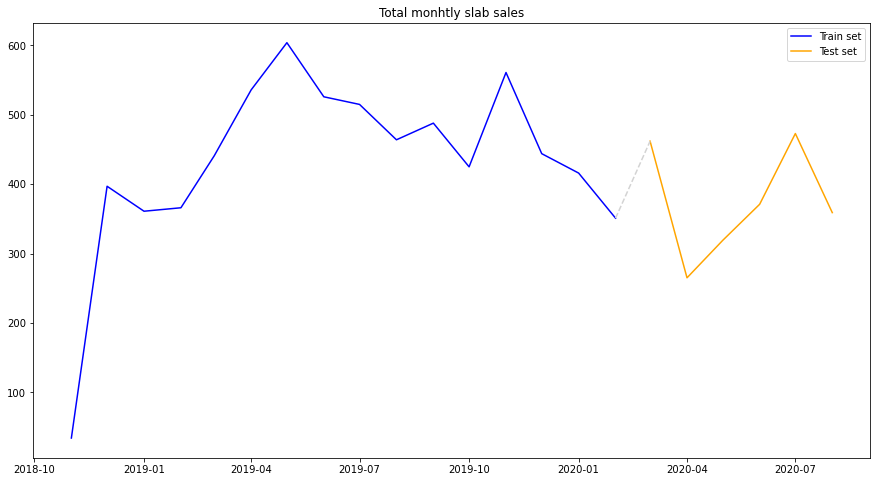

In [13]:
cutoff = math.ceil(slab_totals.shape[0]*0.7)
slab_totals_train = slab_totals[0:cutoff]
slab_totals_test = slab_totals[cutoff:]

plt.figure(figsize=(15,8))
# ax = slab_totals_train.plot(figsize=(15,8), kind='line', y='Totals', color = 'blue', label='Train set')
plt.plot(slab_totals_train, color = 'blue', label='Train set')
# slab_totals_test.plot(ax = ax , figsize=(15,8), kind='line', y='Totals', color = 'orange', label='Test set')
plt.plot(slab_totals_test, color = 'orange', label='Test set')
missing =slab_totals_train.iloc[-1:].append(slab_totals_test.iloc[:1])
plt.plot(missing,color='lightgrey', linestyle = '--')
plt.legend(loc='best')
plt.title('Total monhtly slab sales')
plt.show()

In [14]:
# Adjust sales of April due to COVID effect.
# Using the rolling mean with a window of 6 months, the sale qty for april is estimated.

slab_totals['2020-04'] = slab_totals.rolling(6).mean()['2020-04']



### Apply log transform:

In [15]:
## Apply log to reduce variance of the series:
slab_totals_log = np.log(slab_totals.astype(float))
print(slab_totals_log)

Totals
Date                
2018-11-01  3.526361
2018-12-01  5.983936
2019-01-01  5.888878
2019-02-01  5.902633
2019-03-01  6.089045
2019-04-01  6.284134
2019-05-01  6.403574
2019-06-01  6.265301
2019-07-01  6.244167
2019-08-01  6.139885
2019-09-01  6.190315
2019-10-01  6.052089
2019-11-01  6.329721
2019-12-01  6.095825
2020-01-01  6.030685
2020-02-01  5.860786
2020-03-01  6.135565
2020-04-01  6.031886
2020-05-01  5.765191
2020-06-01  5.916202
2020-07-01  6.159095
2020-08-01  5.883322


### Preparing train and test sets:

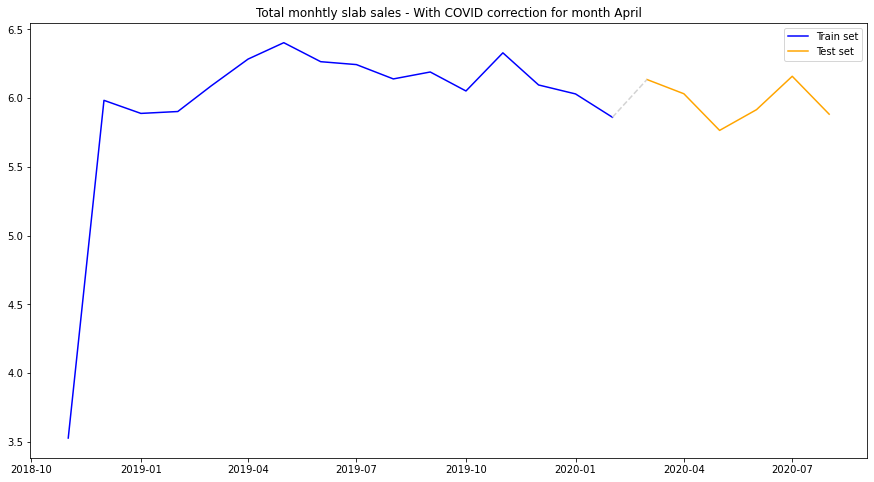

In [16]:
# Preparing the train and test samples:
# 70% of the data will be dedicated to training and the remaining 30% for testing.
cutoff = math.ceil(slab_totals.shape[0]*0.7)
slab_totals_train_log = slab_totals_log[:cutoff]
slab_totals_test_log = slab_totals_log[cutoff:]

# Plotting the figure:
plt.figure(figsize=(15,8))
plt.plot(slab_totals_train_log, color = 'blue', label='Train set')
plt.plot(slab_totals_test_log, color = 'orange', label='Test set')
missing =slab_totals_train_log.iloc[-1:].append(slab_totals_test_log.iloc[:1])

plt.plot(missing,color='lightgrey', linestyle = '--')
plt.legend(loc='best')
plt.title('Total monhtly slab sales - With COVID correction for month April')
plt.show()

## Checking Stationarity:

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

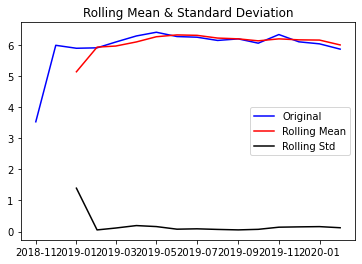

Results of Dickey-Fuller Test:
Test Statistic                 0.907466
p-value                        0.993187
#Lags Used                     6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [18]:
test_stationarity(slab_totals_train_log)

## Differencing:

In [55]:
# Differencing to make the time series stationary

slab_totals_train_log_diff = slab_totals_train_log.diff().dropna()
slab_totals_train_log_diff

,Totals
Date,
2018-12-01,2.457576
2019-01-01,-0.095058
2019-02-01,0.013755
2019-03-01,0.186412
2019-04-01,0.195089
2019-05-01,0.119440
2019-06-01,-0.138273
2019-07-01,-0.021134
2019-08-01,-0.104282


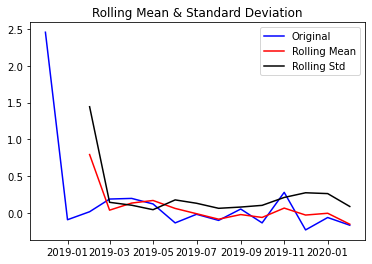

Results of Dickey-Fuller Test:
Test Statistic                -2.655903
p-value                        0.081985
#Lags Used                     5.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [56]:
#Check stationarity to see if differencing had and effect on making the series stationary
test_stationarity(slab_totals_train_log_diff) 
# We see that the time series is stationay with a confidence level of 95%

In [21]:
# must have 2 complete cycles requires 24 observations.
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(slab_totals)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

## ACF & PACF

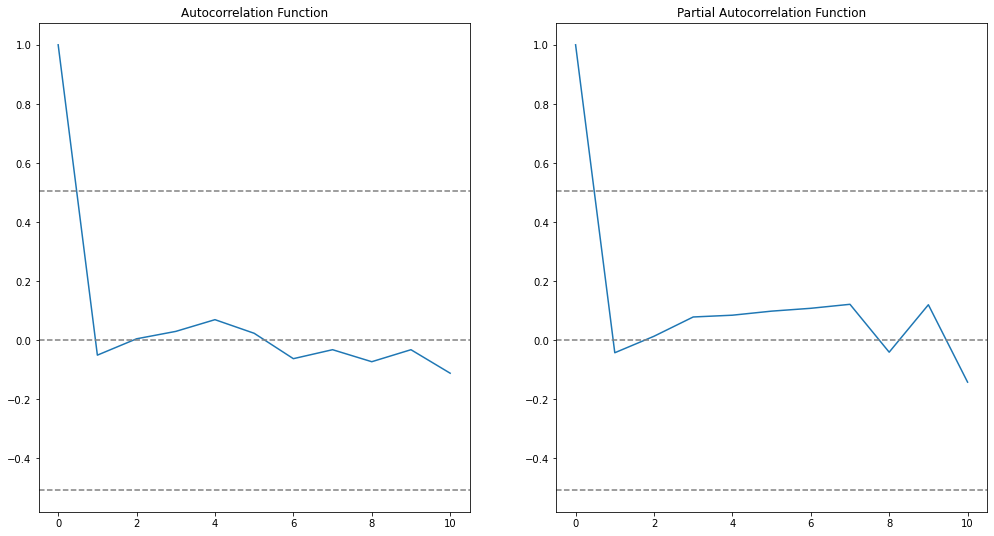

In [22]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(slab_totals_train_log_diff, nlags=10) # nlags is the number of lags to be displayed on the graph
lag_pacf = pacf(slab_totals_train_log_diff, nlags=10, method='ols')

plt.figure(figsize=(17,9))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
# plt.tight_layout()
plt.show()

## ARIMA

### Preparing some tools

In [23]:
# x% MAPE implies the model is about (100-x)% accurate in predicting the next n observations.
def mape(y_true, y_pred): 
    # y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Preparing libraries

In [24]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
# Build a dataframe for different combination of p and q and compute the mape(train set, fitted values) as well as the mape(train set, forecast) 
p_q_mape = pd.DataFrame(columns = ['p','q','mape', 'mape_fc'])
for p in np.arange(12):
    for q in np.arange(12):
        try:
            model = SARIMAX(slab_totals_train_log.astype(float), order=(p, 1, q), seasonal_order = (0, 0, 0, 12))
            results_ARIMA = model.fit(disp=0)
            mape_train = mape(slab_totals_train_log['Totals'], results_ARIMA.fittedvalues)
            fc_log = results_ARIMA.forecast(len(slab_totals_test_log))
            fc = np.exp(fc_log)
            mape_forecast = mape(slab_totals_test['Totals'], fc)
            # print("p(%.4f), q(%.4f):  MAPE %.4f MAPE_FC %.4f"%(p,q, mape, mape_forecast))
        except:
            mape_train = None
            mape_forecast = None
            # print("p(%.4f), q(%.4f): "%(p,q) + 'MAPE none MAPE_FC none')
        p_q_mape = p_q_mape.append(pd.DataFrame({'p': p, 'q':q, 'mape': mape_train, 'mape_fc': mape_forecast}, index=[0]), ignore_index=True)

rmation was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fr

In [63]:
# Sort the dataframe by ascending mape and mape_forecast:
p_q_mape[p_q_mape.mape != None]
p_q_mape.sort_values(by='mape_fc', ascending = True, inplace=True)
# p_q_mape.sort_values(by='mape', ascending = True, inplace=True)
p_q_mape.head()

,p,q,mape,mape_fc
51,4,3,15.282173,10.448770
12,1,0,11.459148,12.110238
24,2,0,11.509323,12.232601
1,0,1,11.162224,12.249419
2,0,2,12.925412,12.712977


In [27]:
# Select the values of p and q that render the lowest forecast mape (remeber that forecast mape is the mean absolute error between the test set and the forecast values)
p_selected = list(p_q_mape[p_q_mape.mape_fc == p_q_mape.mape_fc.min()]['p'])[0]
q_selected = list(p_q_mape[p_q_mape.mape_fc == p_q_mape.mape_fc.min()]['q'])[0]

In [28]:
print("Values of p & q rendering lowest forecast mape: p(%.4f), q(%.4f)"%(p_selected,q_selected))

Values of p & q rendering lowest forecast mape: p(4.0000), q(3.0000)


### Defining the selected model

In [74]:

# The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q).
# model = SARIMAX(slab_totals_train_log.diff(2).dropna().astype(float), order=(0, 0, 1))

# model_selected = SARIMAX(slab_totals_train_log.astype(float), order=(1, 1, 1), seasonal_order = (0, 0, 0, 12)) # Best mape with fitted values
# model = SARIMAX(slab_totals_train_log.astype(float), order=(4, 1, 3), seasonal_order = (0, 0, 0, 12)) # Best mape forecast compared to test set

model_selected = SARIMAX(slab_totals_train_log.astype(float), order=(p_selected, 1, q_selected), seasonal_order = (0, 0, 0, 12)) 

results_ARIMA = model_selected.fit(disp=0) 
print(results_ARIMA.summary())

SARIMAX Results                                
Dep. Variable:                 Totals   No. Observations:                   16
Model:               SARIMAX(4, 1, 3)   Log Likelihood             -178429.785
Date:                Tue, 25 Aug 2020   AIC                         356875.569
Time:                        16:41:40   BIC                         356881.234
Sample:                    11-01-2018   HQIC                        356875.509
                         - 02-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0437      0.000  -2310.326      0.000      -1.045      -1.043
ar.L2         -0.5115      0.001   -701.208      0.000      -0.513      -0.510
ar.L3         -0.1175      0.001   -188.801      0.000      -0.119      -0.116
ar.L

### Analyzing the model:

RMS: 1.2803
RSS: 26.2280


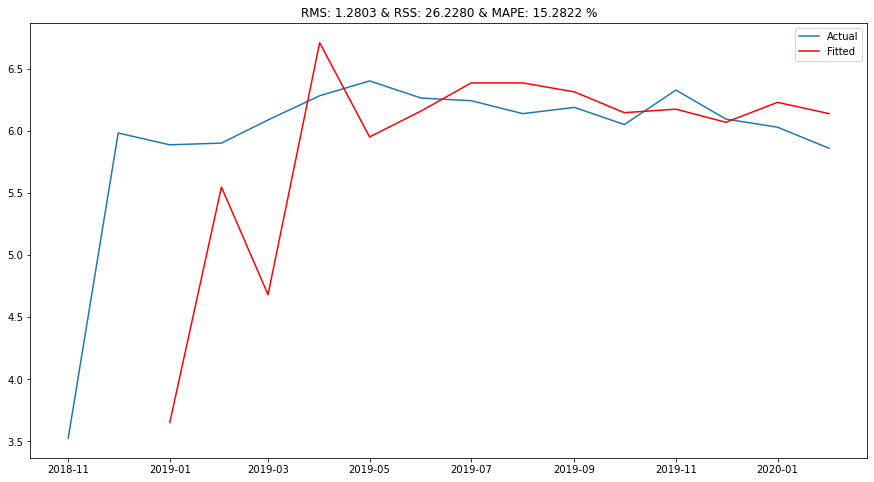

In [75]:
plt.figure(figsize=(15,8)) 
plt.plot(slab_totals_train_log, label='Actual')
plt.plot(results_ARIMA.fittedvalues[2:], color='red',label = 'Fitted')
plt.legend(loc='best')

rss = sum((results_ARIMA.fittedvalues-slab_totals_train_log['Totals'])**2)

rms = sqrt(mean_squared_error(slab_totals_train_log['Totals'],results_ARIMA.fittedvalues))
# rms = 0

mape_train = mape(slab_totals_train_log['Totals'], results_ARIMA.fittedvalues)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms,rss, mape_train))

print('RMS: %.4f'% rms)
print('RSS: %.4f'% rss)

In [76]:
results_ARIMA.fittedvalues.shape
# slab_totals_train

(16,)

<Figure size 1224x648 with 0 Axes>

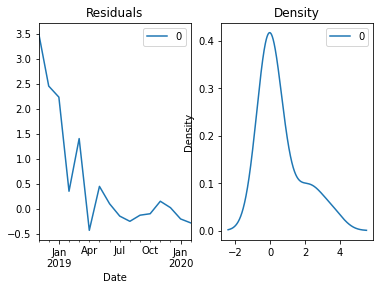

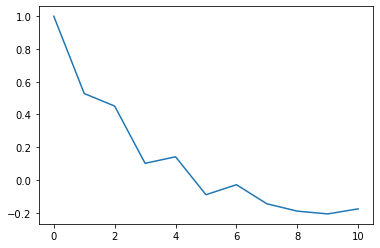

In [77]:
residuals = pd.DataFrame(results_ARIMA.resid)
plt.figure(figsize=(17,9))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

resid_acf = acf(results_ARIMA.resid, nlags=10)
plt.plot(resid_acf)

### Forecasting and comparing to the test set

RSS: 0.1090
RMS: 0.1348
MAPE: 1.6931%


Text(0.5, 1.0, 'RMS: 0.1348 & RSS: 0.1090 & MAPE: 1.6931 %')

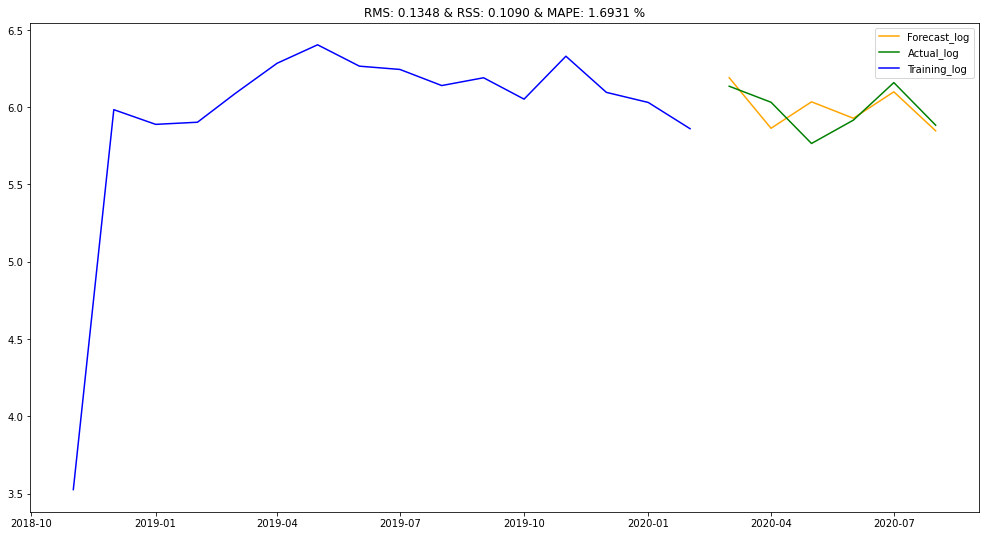

In [78]:
# Computing forecast data based on the length of the test set:
fc_log = results_ARIMA.forecast(len(slab_totals_test_log))  # 95% conf

plt.figure(figsize=(17,9))
plt.plot(fc_log, color='orange', label='Forecast_log')
plt.plot(slab_totals_test_log, color='green', label='Actual_log')
plt.plot(slab_totals_train_log, color='blue', label='Training_log')
plt.legend(loc='best')

rss_log_forecast = sum((fc_log-slab_totals_test_log['Totals'])**2)
print('RSS: %0.4f'%rss_log_forecast)

rms_log_forecast = sqrt(mean_squared_error(slab_totals_test_log['Totals'],fc_log))
print('RMS: %0.4f'%rms_log_forecast)

mape_log_forecast = mape(slab_totals_test_log['Totals'], fc_log)
print('MAPE: %0.4f%%'%mape_log_forecast)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms_log_forecast,rss_log_forecast, mape_log_forecast))

RSS: 15522.2620
RMS: 50.8630
MAPE: 10.4488%


Text(0.5, 1.0, 'RMS: 50.8630 & RSS: 15522.2620 & MAPE: 10.4488 %')

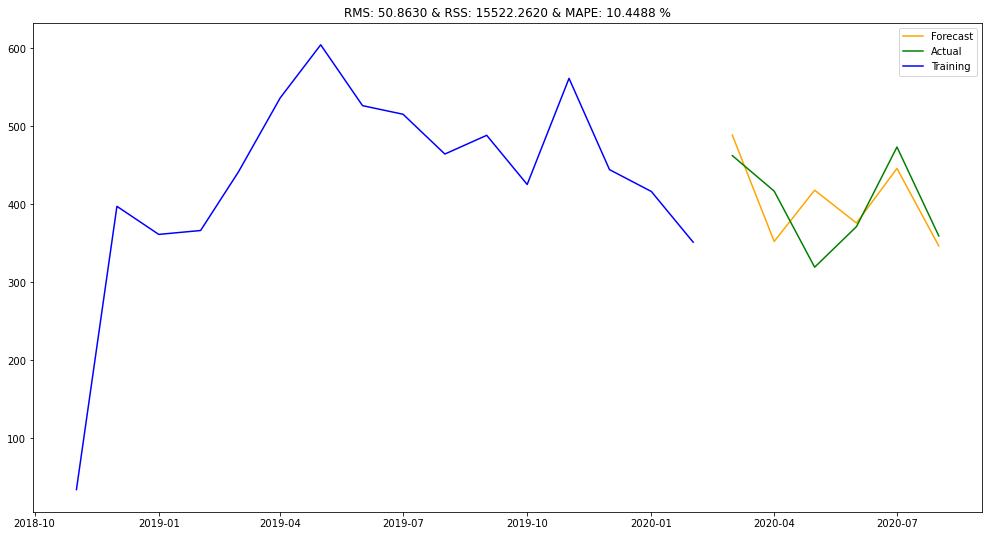

In [79]:
fc = np.exp(fc_log)
plt.figure(figsize=(17,9))
plt.plot(fc, color='orange', label='Forecast')
plt.plot(np.exp(slab_totals_test_log), color='green', label='Actual')
plt.plot(np.exp(slab_totals_train_log), color='blue', label='Training')
plt.legend(loc='best')

rss_forecast = sum((fc-slab_totals_test['Totals'])**2)
print('RSS: %0.4f'%rss_forecast)

rms_forecast = sqrt(mean_squared_error(slab_totals_test['Totals'],fc))
print('RMS: %0.4f'%rms_forecast)

mape_forecast = mape(slab_totals_test['Totals'], fc)
print('MAPE: %0.4f%%'%mape_forecast)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms_forecast,rss_forecast, mape_forecast))

## Retraining the model on the whole set and forecasting 2 months:

In [80]:
# model_retrained = SARIMAX(slab_totals_log.astype(float), order=(7, 1, 7), seasonal_order = (0, 0, 0, 12)) 

model_retrained = SARIMAX(slab_totals_log.astype(float), order=(p_selected, 1, q_selected), seasonal_order = (0, 0, 0, 12)) 

results_ARIMA_retrained = model_retrained.fit(disp=0) 

C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RMS: 1.2803 & RSS: 21.5943 & MAPE: 10.3256 %')

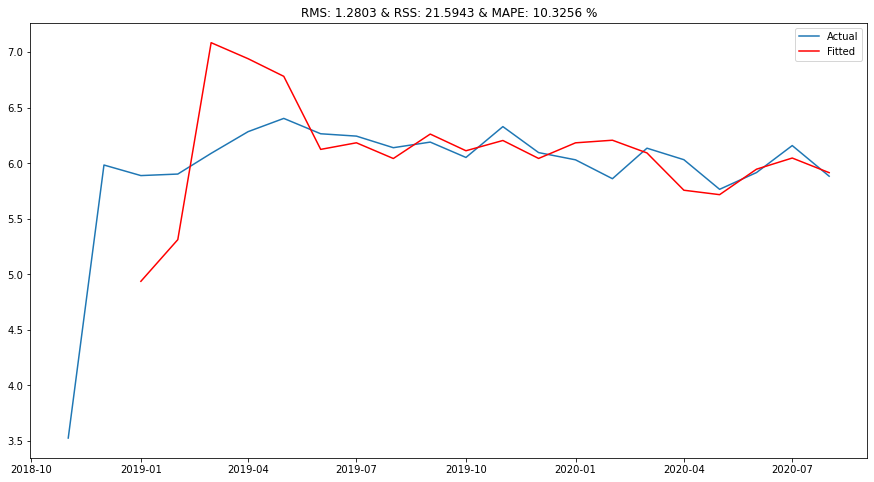

In [81]:
plt.figure(figsize=(15,8)) 
plt.plot(slab_totals_log, label='Actual')
plt.plot(results_ARIMA_retrained.fittedvalues[2:], color='red',label = 'Fitted')
plt.legend(loc='best')

rss = sum((results_ARIMA_retrained.fittedvalues-slab_totals_log['Totals'])**2)

# rms = sqrt(mean_squared_error(slab_totals_log['Totals'],results_ARIMA_retrained.fittedvalues))

mape_train = mape(slab_totals_log['Totals'], results_ARIMA_retrained.fittedvalues)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms,rss, mape_train))

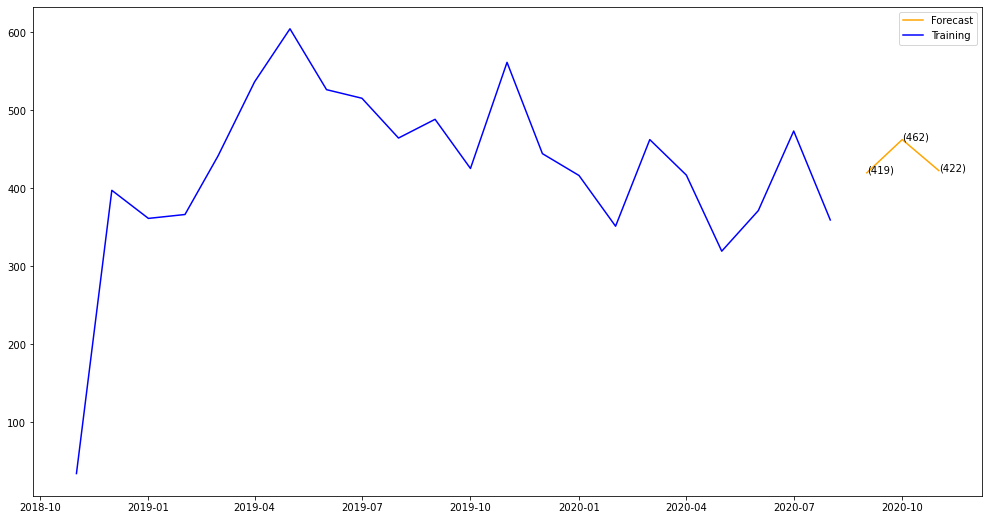

In [121]:
# Perform a forecast for next 3 months:
fc_retrained_log = results_ARIMA_retrained.forecast(3)

fc_retrained = np.exp(fc_retrained_log)

plt.figure(figsize=(17,9))
plt.plot(fc_retrained, color='orange', label='Forecast')
plt.plot(slab_totals, color='blue', label='Training')
plt.legend(loc='best')

for date, qty in zip(fc_retrained.index, list(fc_retrained.iloc[0:3,])):
    plt.text(date, qty, '({})'.format(math.floor(qty)))

# rss_forecast = sum((fc_retrained-slab_totals['Totals'])**2)
# print('RSS: %0.4f'%rss_forecast)

# rms_forecast = sqrt(mean_squared_error(slab_totals['Totals'],fc_retrained))
# print('RMS: %0.4f'%rms_forecast)

# mape_forecast = mape(slab_totals['Totals'], fc_retrained)
# print('MAPE: %0.4f%%'%mape_forecast)

# plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms_forecast,rss_forecast, mape_forecast))

In [114]:
print(list(fc_retrained.iloc[0:3,]))

[419.4505594509168, 462.0423263807534, 422.29439944489786]


## Auto Arima

In [38]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [39]:
arima_model = arimamodel(slab_totals_train_log)
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=34.923, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=32.390, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=33.553, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=33.198, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=33.394, Time=0.00 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.118 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -15.195
Date:                Tue, 25 Aug 2020   AIC                             32.390
Time:                        16:29:30   BIC                             33.029
Sample:                             0   HQIC                            32.330
                                 - 16                                         
Covaria

## Predictions and test verification:

### ARIMA

In [40]:
# start = len(slab_totals_train) 
# end = len(slab_totals_train) + len(slab_totals_test) - 1
# forecast = results_ARIMA.forecast(len(slab_totals_test))